In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os

USE_DRIVE = False
if USE_DRIVE:
    from google.colab import drive

    drive.mount('/content/gdrive')
    ROOT_DRIVE = '/content/gdrive/MyDrive/'
    DRIVE_FOLDER_PATH = os.path.join(ROOT_DRIVE, 'HuBMAP')
    IMAGES_PATH = os.path.join(DRIVE_FOLDER_PATH, 'hubmap-256x256', 'train')
    MASKS_PATH = os.path.join(DRIVE_FOLDER_PATH, 'hubmap-256x256', 'masks')
else:
    IMAGES_PATH = os.path.join('data', '256x256', 'train')
    MASKS_PATH = os.path.join('data', '256x256', 'masks')

In [3]:
!nvidia-smi

fish: Unknown command: nvidia-smi
fish: 
nvidia-smi
^


# DeepLab HuBMAP

In [4]:
from utils import get_device_colab, set_deterministic_colab

NOT_COLAB = True
if not NOT_COLAB:

    DEVICE = get_device_colab()
else:
    DEVICE = 'cpu'

SEED = 42
set_deterministic_colab(SEED)

In [5]:
from model.pretrained_models import get_deeplabv3_resnet

model = get_deeplabv3_resnet(DEVICE, resnet_layers=101).to(DEVICE)

  0%|          | 0/161 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Training epoch 1/1:


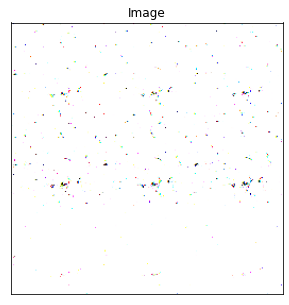

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


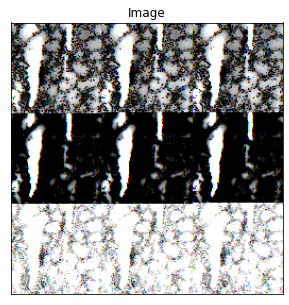

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


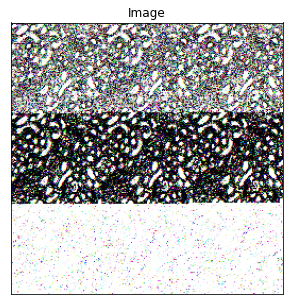

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


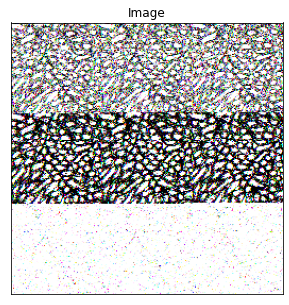

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


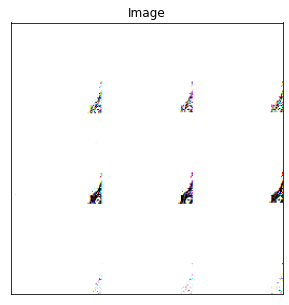

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


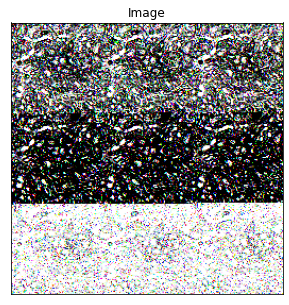

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


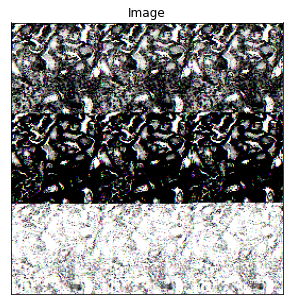

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


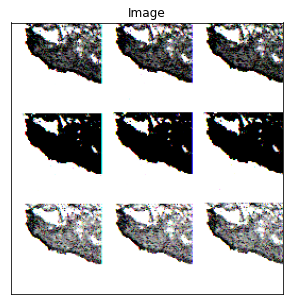

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


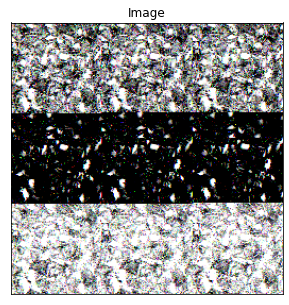

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


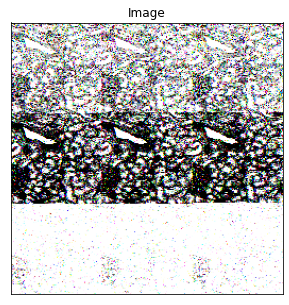

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


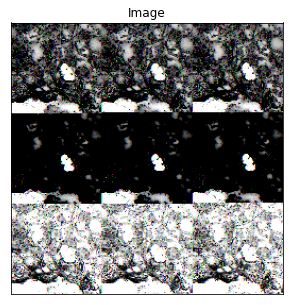

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


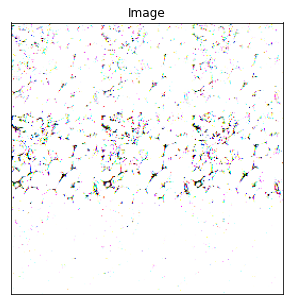

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


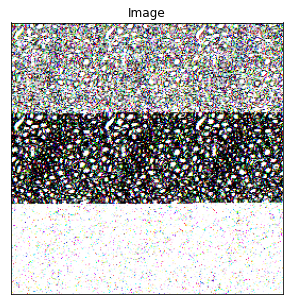

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


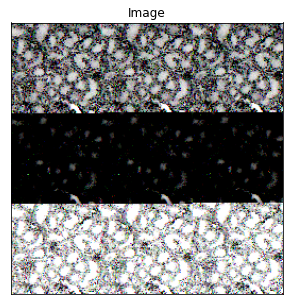

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


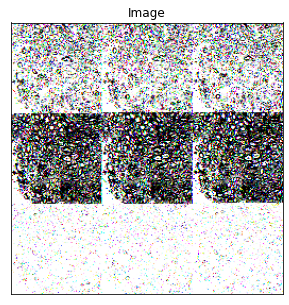

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


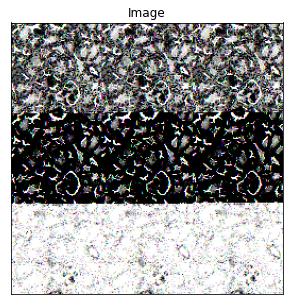

  0%|          | 0/161 [00:01<?, ?it/s]


In [29]:
from preprocessing.dataset import get_training_validation_sets, HuBMAPDataset
from preprocessing.augmentation import get_augmentations
from training.loop import Trainer
from training.loss_functions import BinaryDiceLoss

import torch
from torchvision import transforms

# From https://pytorch.org/docs/stable/torchvision/models.html
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

training_dataset, training_images, validation_dataset, validation_images = get_training_validation_sets(IMAGES_PATH,
                                                                                                        MASKS_PATH,
                                                                                                        0.3, 
                                                                                                        {'train': get_augmentations(train=True),
                                                                                                         'val': None},
                                                                                                        mean,
                                                                                                        std)

criterion = BinaryDiceLoss().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

trainer = Trainer(model,
                  0.3,
                  criterion,
                  optimizer,
                  training_dataset,
                  16,
                  "logs",
                  DEVICE)

stats = trainer.train(1, verbose=True)

In [ ]:
print(stats)

In [ ]:
from evaluation.test import Test

tester = Test(model,
              0.3,
              "data/test",
              256,
              0,
              DEVICE)

sub_dict = tester.test("logs/submission.csv", verbose=True)

In [ ]:
sub_dict